Rastgele Ajanı - Deneme 1: Başarı Oranı: %100.00
Rastgele Ajanı - Deneme 2: Başarı Oranı: %100.00
Rastgele Ajanı - Deneme 3: Başarı Oranı: %0.00
Rastgele Ajanı - Deneme 4: Başarı Oranı: %0.00
Rastgele Ajanı - Deneme 5: Başarı Oranı: %100.00
Rastgele Ajanı - Deneme 6: Başarı Oranı: %100.00
Rastgele Ajanı - Deneme 7: Başarı Oranı: %100.00
Rastgele Ajanı - Deneme 8: Başarı Oranı: %0.00
Rastgele Ajanı - Deneme 9: Başarı Oranı: %100.00
Rastgele Ajanı - Deneme 10: Başarı Oranı: %100.00
Rastgele Ajanı - Genel Başarı Oranı: %70.00
Refleks Ajanı - Deneme 1: Başarı Oranı: %100.00
Refleks Ajanı - Deneme 2: Başarı Oranı: %100.00
Refleks Ajanı - Deneme 3: Başarı Oranı: %100.00
Refleks Ajanı - Deneme 4: Başarı Oranı: %100.00
Refleks Ajanı - Deneme 5: Başarı Oranı: %100.00
Refleks Ajanı - Deneme 6: Başarı Oranı: %100.00
Refleks Ajanı - Deneme 7: Başarı Oranı: %100.00
Refleks Ajanı - Deneme 8: Başarı Oranı: %100.00
Refleks Ajanı - Deneme 9: Başarı Oranı: %100.00
Refleks Ajanı - Deneme 10: Başarı Oranı

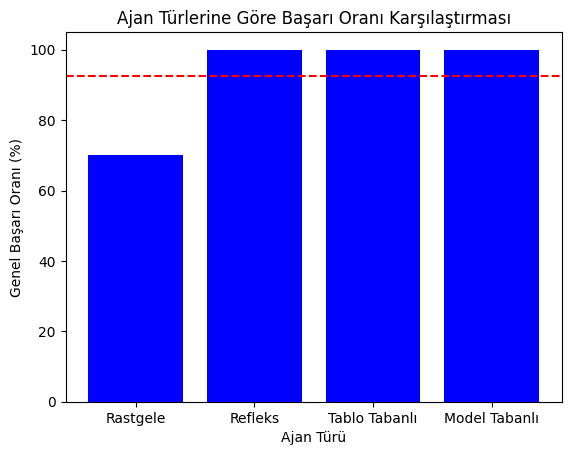

In [9]:
import random
import matplotlib.pyplot as plt

class ElektrikSupurgesiOrtam:
    def __init__(self):
        self.konumlar = {
            "A": random.choice(["Temiz", "Kirli"]),
            "B": random.choice(["Temiz", "Kirli"])
        }
        self.ajan_konum = random.choice(["A", "B"])

    def temiz_mi(self):
        return self.konumlar["A"] == "Temiz" and self.konumlar["B"] == "Temiz"

    def sola_git(self):
        self.ajan_konum = "A"

    def saga_git(self):
        self.ajan_konum = "B"

    def supur(self):
        self.konumlar[self.ajan_konum] = "Temiz"

    def eylemi_gerceklestir(self, eylem):
        if eylem == "sola":
            self.sola_git()
        elif eylem == "sağa":
            self.saga_git()
        elif eylem == "süpür":
            self.supur()

class RastgeleAjan:
    def __init__(self, ortam):
        self.env = ortam

    def act(self):
        eylem = random.choice(["sola", "sağa", "süpür"])
        self.env.eylemi_gerceklestir(eylem)

class RefleksAjan:
    def __init__(self, ortam):
        self.env = ortam
        self.successful_cleanings = 0

    def act(self):
        if self.env.konumlar[self.env.ajan_konum] == "Kirli":
            self.env.eylemi_gerceklestir("süpür")
            self.successful_cleanings += 1
        else:
            hareket = random.choice(["sola", "sağa"])
            self.env.eylemi_gerceklestir(hareket)

class TabloTabanliAjan:
    def __init__(self, ortam):
        self.env = ortam
        self.successful_cleanings = 0
        self.eylem_tablosu = {
            "Kirli_A": "süpür",
            "Kirli_B": "süpür",
            "Temiz_A": "sağa",
            "Temiz_B": "sola"
        }

    def act(self):
        durum = f"{self.env.konumlar[self.env.ajan_konum]}_{self.env.ajan_konum}"
        eylem = self.eylem_tablosu.get(durum, "bekle")
        self.env.eylemi_gerceklestir(eylem)

class ModelTabanliAjan:
    def __init__(self, ortam):
        self.env = ortam
        self.successful_cleanings = 0

    def act(self):
        current_state = self.env.konumlar[self.env.ajan_konum]
        if current_state == "Kirli":
            self.env.eylemi_gerceklestir("süpür")
            self.successful_cleanings += 1
        else:
            if self.env.ajan_konum == "A":
                self.env.eylemi_gerceklestir("sağa")
            else:
                self.env.eylemi_gerceklestir("sola")

def simulate_ajan(ajan_turu, deneme_sayisi=10):
    basari_oranlari = []
    
    for deneme in range(deneme_sayisi):
        ortam = ElektrikSupurgesiOrtam()
        
        if ajan_turu == "Rastgele":
            ajan_instance = RastgeleAjan(ortam)
        elif ajan_turu == "Refleks":
            ajan_instance = RefleksAjan(ortam)
        elif ajan_turu == "Tablo Tabanlı":
            ajan_instance = TabloTabanliAjan(ortam)
        elif ajan_turu == "Model Tabanlı":
            ajan_instance = ModelTabanliAjan(ortam)

        for _ in range(10):  # 10 adım
            ajan_instance.act()
        
        if ortam.temiz_mi():
            success_rate = 100
        else:
            success_rate = 0
            
        basari_oranlari.append(success_rate)
        
        print(f"{ajan_turu} Ajanı - Deneme {deneme + 1}: Başarı Oranı: %{success_rate:.2f}")
    
    genel_basari_orani = sum(basari_oranlari) / deneme_sayisi
    print(f"{ajan_turu} Ajanı - Genel Başarı Oranı: %{genel_basari_orani:.2f}")
    return genel_basari_orani

if __name__ == "__main__":
    ajanlar = ["Rastgele", "Refleks", "Tablo Tabanlı", "Model Tabanlı"]
    genel_basari_oranlari = []

    for ajan in ajanlar:
        oran = simulate_ajan(ajan)
        genel_basari_oranlari.append(oran)

    # Karşılaştırma grafiği
    plt.bar(ajanlar, genel_basari_oranlari, color='blue')
    plt.xlabel('Ajan Türü')
    plt.ylabel('Genel Başarı Oranı (%)')
    plt.title('Ajan Türlerine Göre Başarı Oranı Karşılaştırması')
    plt.axhline(y=sum(genel_basari_oranlari) / len(genel_basari_oranlari), color='red', linestyle='--')
    plt.show()
